In [1]:
import os
import numpy as np
import pylab as pl
import json
from scipy.optimize import curve_fit,minimize

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
m1=80

In [3]:
df=m1 #for chisq atleast
md={}

    

c=json.load(open('pui.json'))
pl.rcParams.update(c)

%pylab inline




Populating the interactive namespace from numpy and matplotlib


C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [13]:
mysize=2000/(np.array(range(1,100)+[10]))
#mysize=(np.random.rand(100)*1000).astype(int)
print (mysize, mysize.shape)
#len(mysize) will be 100



(array([2000, 1000,  666,  500,  400,  333,  285,  250,  222,  200,  181,
        166,  153,  142,  133,  125,  117,  111,  105,  100,   95,   90,
         86,   83,   80,   76,   74,   71,   68,   66,   64,   62,   60,
         58,   57,   55,   54,   52,   51,   50,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   40,   39,   38,   37,   37,   36,
         35,   35,   34,   33,   33,   32,   32,   31,   31,   30,   30,
         29,   29,   28,   28,   28,   27,   27,   27,   26,   26,   25,
         25,   25,   25,   24,   24,   24,   23,   23,   23,   22,   22,
         22,   22,   21,   21,   21,   21,   21,   20,   20,   20,   20,
        200]), (100,))


2000
1000
666
500
400
333
285
250
222
200
181
166
153
142
133
125
117
111
105
100
95
90
86
83
80
76
74
71
68
66
64
62
60
58
57
55
54
52
51
50
48
47
46
45
44
43
42
41
40
40
39
38
37
37
36
35
35
34
33
33
32
32
31
31
30
30
29
29
28
28
28
27
27
27
26
26
25
25
25
25
24
24
24
23
23
23
22
22
22
22
21
21
21
21
21
20
20
20
20
200


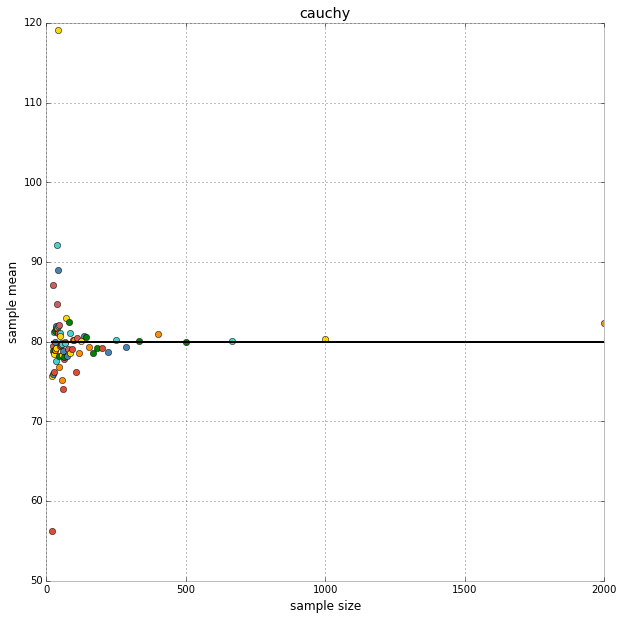

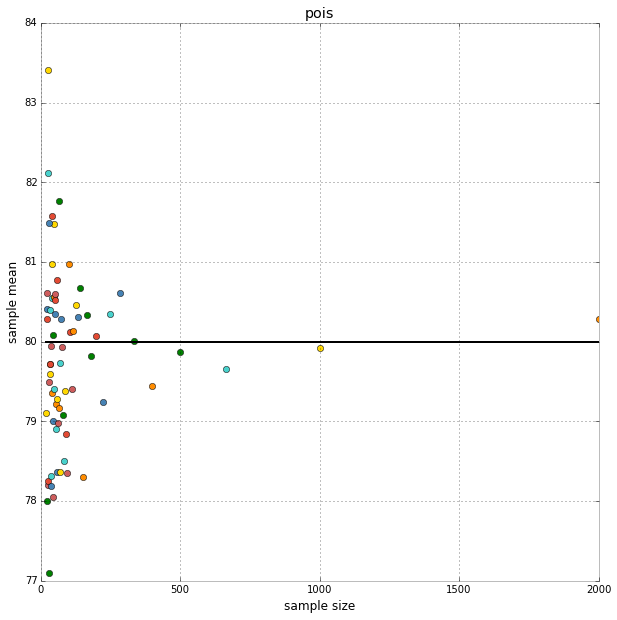

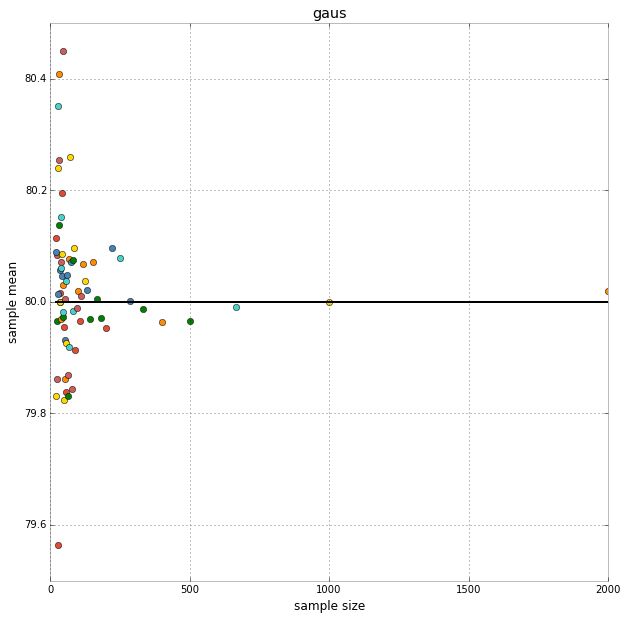

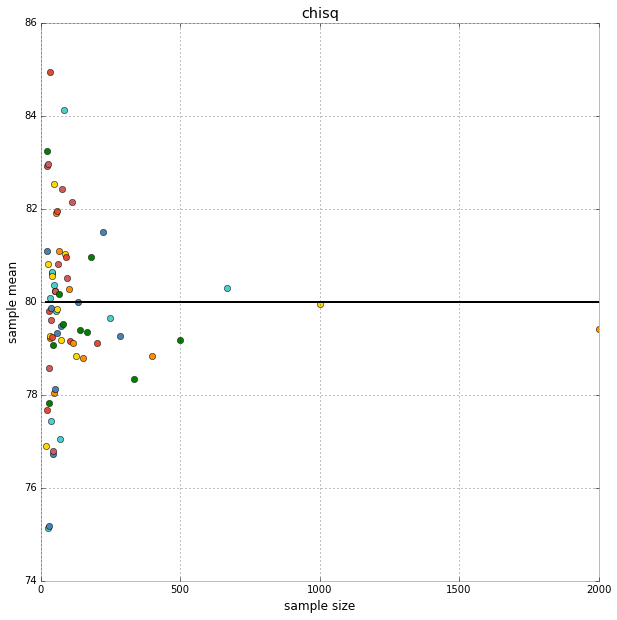

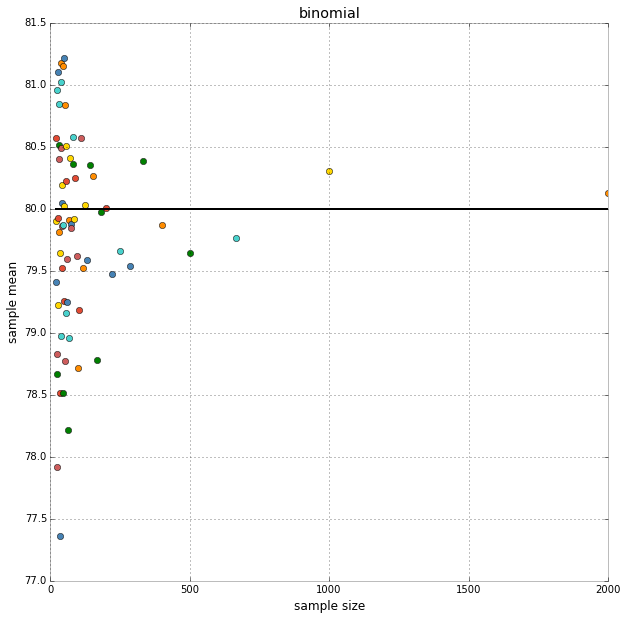

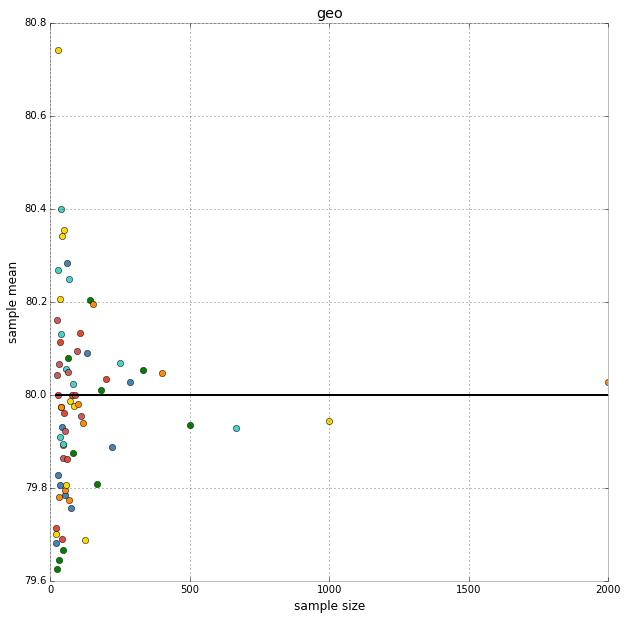

In [11]:
md = {'pois':{}, 'gaus':{}, 'chisq':{}, 'cauchy':{}, 'geo':{}, 'binomial':{}}

    



for n in mysize:
    #print n if you want to see the different sizes again 
    # we need to centre the mean around 80 for all distributions
    md['chisq'][n] = np.random.chisquare(80, size=n)
    md["pois"][n]=np.random.poisson(80,n)
    md["gaus"][n]=np.random.normal(80.0,1,n)
    md["cauchy"][n]=np.random.standard_cauchy(80)+80
    md["geo"][n]=np.random.geometric(0.5,n)+78
    md["binomial"][n]=np.random.binomial(160,0.5,n)

means = {}
for i in md:
    means[i]={}
    fig_mu_N = pl.figure(figsize=(10,10))
    axchisq_mu_n = fig_mu_N.add_subplot(111)

    for nn in md[i].iterkeys():
        means[i][nn] = md[i][nn].mean()
        
        axchisq_mu_n.plot(nn, means[i][nn], 'o')
        axchisq_mu_n.set_title(i)
        axchisq_mu_n.set_xlabel('sample size')
        axchisq_mu_n.set_ylabel('sample mean')
        axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
        
    

    
    
    
    

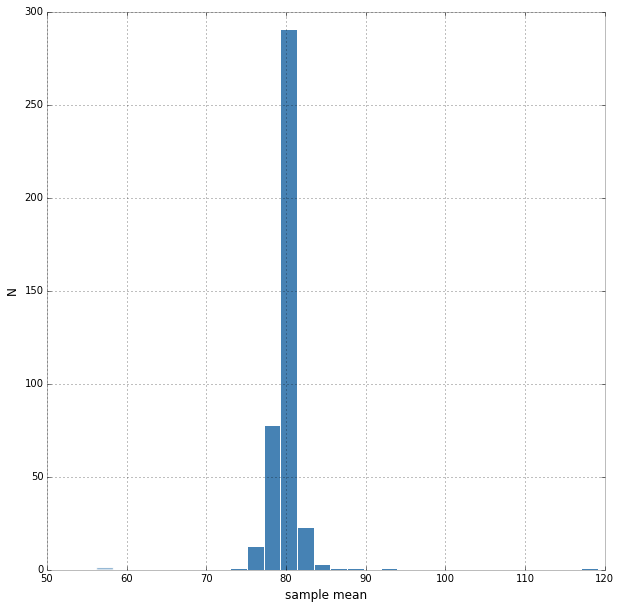

In [14]:
allmeans=[]
for i in md:
    for n in means[i]:
        allmeans.append(means[i][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean')
pl.ylabel('N')